#Covid Dataset

In [1]:
!pip install -q kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d pranavraikokte/covid19-image-dataset

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/pranavraikokte/covid19-image-dataset
License(s): CC-BY-SA-4.0
 96% 151M/158M [00:00<00:00, 188MB/s]
100% 158M/158M [00:00<00:00, 183MB/s]


In [2]:
!unzip "/content/covid19-image-dataset.zip" -d "/content/dataset/"

Archive:  /content/covid19-image-dataset.zip
  inflating: /content/dataset/Covid19-dataset/test/Covid/0100.jpeg  
  inflating: /content/dataset/Covid19-dataset/test/Covid/0102.jpeg  
  inflating: /content/dataset/Covid19-dataset/test/Covid/0105.png  
  inflating: /content/dataset/Covid19-dataset/test/Covid/0106.jpeg  
  inflating: /content/dataset/Covid19-dataset/test/Covid/0108.jpeg  
  inflating: /content/dataset/Covid19-dataset/test/Covid/0111.jpg  
  inflating: /content/dataset/Covid19-dataset/test/Covid/0112.jpg  
  inflating: /content/dataset/Covid19-dataset/test/Covid/0113.jpg  
  inflating: /content/dataset/Covid19-dataset/test/Covid/0115.jpeg  
  inflating: /content/dataset/Covid19-dataset/test/Covid/0118.jpeg  
  inflating: /content/dataset/Covid19-dataset/test/Covid/0119.jpeg  
  inflating: /content/dataset/Covid19-dataset/test/Covid/0120.jpg  
  inflating: /content/dataset/Covid19-dataset/test/Covid/094.png  
  inflating: /content/dataset/Covid19-dataset/test/Covid/096.png 

In [3]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

(-0.5, 2666.5, 2279.5, -0.5)

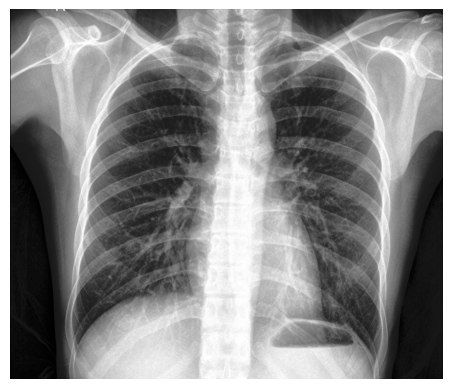

In [4]:
image = cv2.imread("/content/dataset/Covid19-dataset/train/Normal/05.jpeg")
plt.imshow(image)
plt.axis('off')

In [5]:
kernel = np.array([[-1/9, -1/9, -1/9],
                   [-1/9, 8/9, -1/9],
                   [-1/9, -1/9, -1/9]])


#Highpass and Highboost

In [6]:
def highpass(img, filter):
  output = []
  for r in range(img.shape[0]-2):
    temp = []
    for c in range(img.shape[1]-2):
      lhs = img[r:r+3, c:c+3]
      ans = 0
      for r_f in range(filter.shape[0]):
        for c_f in range(filter.shape[1]):
          ans += lhs[r_f][c_f]*filter[r_f][c_f]
      temp.append(ans)
    output.append(temp)
  return output

In [7]:
def add_padding(image, pad_size=1):
    if len(image.shape) == 2:
        return np.pad(image, ((pad_size, pad_size), (pad_size, pad_size)), mode='constant')
    elif len(image.shape) == 3:
        return np.pad(image, ((pad_size, pad_size), (pad_size, pad_size), (0, 0)), mode='constant')

def apply_kernel(image, kernel):

    kernel_size = kernel.shape[0]
    if len(image.shape) == 2:
        image_height, image_width = image.shape
        output = np.zeros((image_height - kernel_size + 1, image_width - kernel_size + 1))

        for i in range(output.shape[0]):
            for j in range(output.shape[1]):
                roi = image[i:i+kernel_size, j:j+kernel_size]
                output[i, j] = np.sum(roi * kernel)

    elif len(image.shape) == 3:
        image_height, image_width, channels = image.shape
        output = np.zeros((image_height - kernel_size + 1, image_width - kernel_size + 1, channels))

        for c in range(channels):
            for i in range(output.shape[0]):
                for j in range(output.shape[1]):
                    roi = image[i:i+kernel_size, j:j+kernel_size, c]
                    output[i, j, c] = np.sum(roi * kernel)

    return output

(-0.5, 2666.5, 2279.5, -0.5)

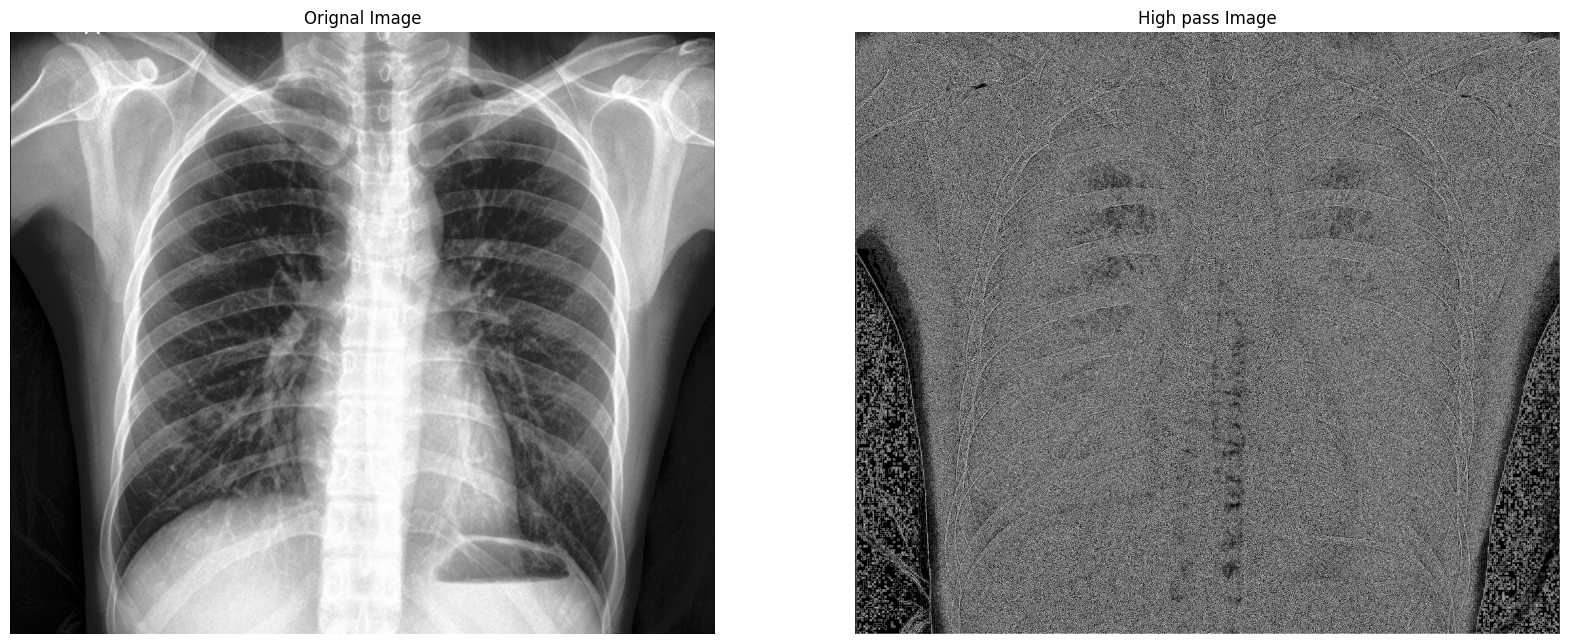

In [8]:
padded_image = add_padding(image)
output_image = apply_kernel(padded_image, kernel)
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.title("Orignal Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("High pass Image")
plt.imshow(output_image)
plt.axis('off')

In [9]:
boost_kernel = np.array([[-1/9, -1/9, -1/9],
                         [-1/9, 8/9, -1/9],
                         [-1/9, -1/9, -1/9]])

In [10]:
def highboost_filter(original_image, kernel_output, highpass_image, A=1.5):
    return (A - 1) * kernel_output + highpass_image

In [11]:
boost_kernel_output = apply_kernel(padded_image, boost_kernel)

(-0.5, 2666.5, 2279.5, -0.5)

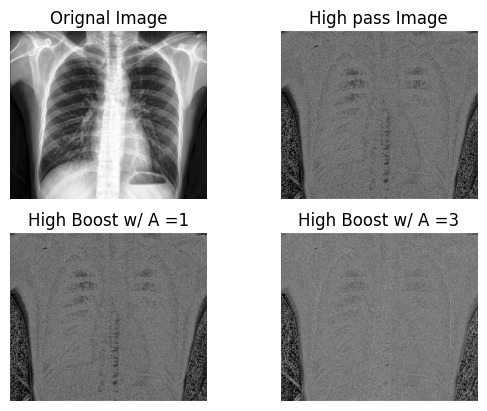

In [12]:
A = 1
highboost_image1 = highboost_filter(image, boost_kernel_output,output_image, A)
A = 3
highboost_image2 = highboost_filter(image, boost_kernel_output,output_image, A)


plt.subplot(2, 2, 1)
plt.title("Orignal Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title("High pass Image")
plt.imshow(output_image)
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title("High Boost w/ A =1")
plt.imshow(highboost_image1)
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title("High Boost w/ A =3")
plt.imshow(highboost_image2)
plt.axis('off')

# Repeating for Colour Image

(-0.5, 639.5, 479.5, -0.5)

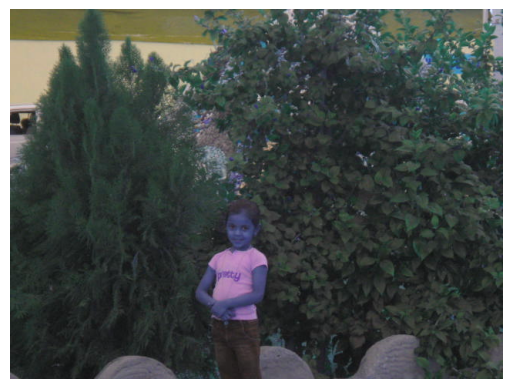

In [13]:
colour_image = cv2.imread("/content/IMG_1251.JPG")
plt.imshow(colour_image)
plt.axis('off')

(-0.5, 639.5, 479.5, -0.5)

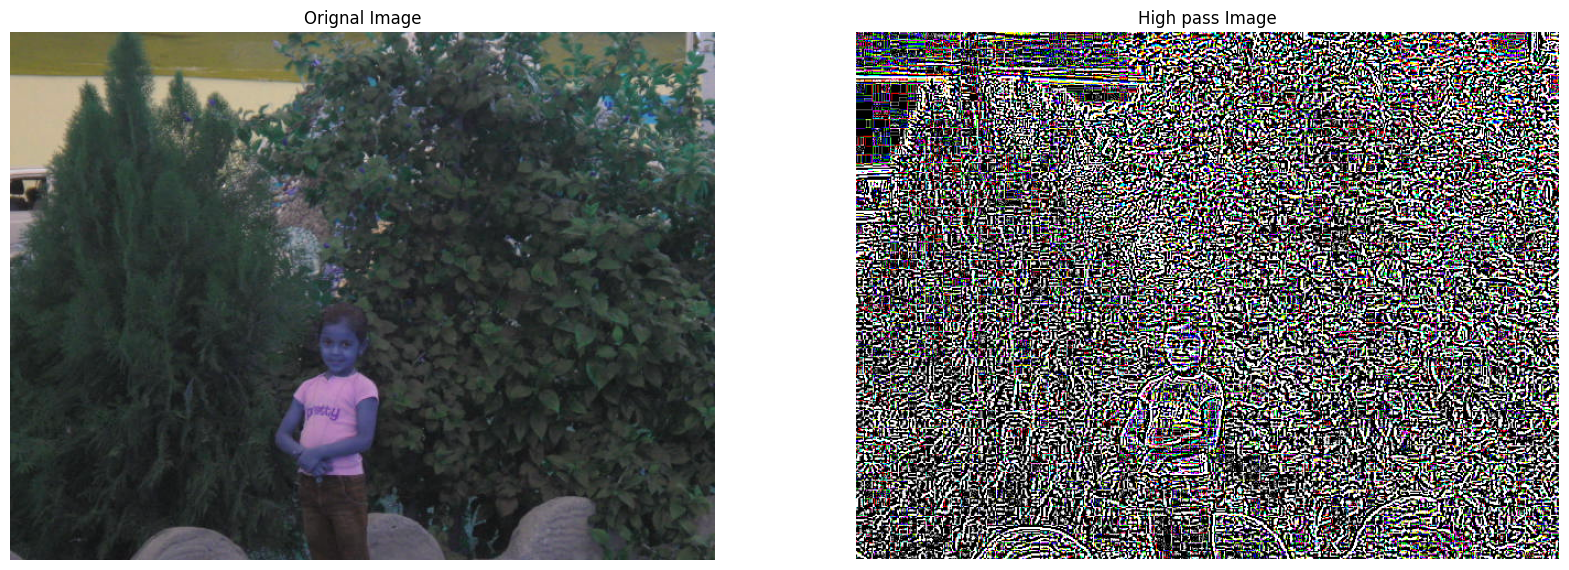

In [14]:
padded_colour_image = add_padding(colour_image)
colour_output_image = apply_kernel(padded_colour_image, kernel)
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.title("Orignal Image")
plt.imshow(colour_image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("High pass Image")
plt.imshow(colour_output_image)
plt.axis('off')

In [15]:
boost_kernel_output_coloured = apply_kernel(padded_colour_image, boost_kernel)

(-0.5, 639.5, 479.5, -0.5)

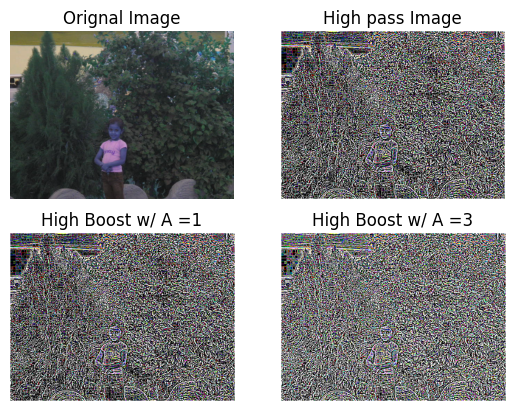

In [16]:
A = 1
highboost_image_colour1 = highboost_filter(colour_image, boost_kernel_output_coloured,colour_output_image, A)
A = 3
highboost_image_colour2 = highboost_filter(colour_image, boost_kernel_output_coloured,colour_output_image, A)


plt.subplot(2, 2, 1)
plt.title("Orignal Image")
plt.imshow(colour_image)
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title("High pass Image")
plt.imshow(colour_output_image)
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title("High Boost w/ A =1")
plt.imshow(highboost_image_colour1)
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title("High Boost w/ A =3")
plt.imshow(highboost_image_colour2)
plt.axis('off')

#Applications

1. Edge Detection in Image Processing
High-pass filters are essential for enhancing edges in images, making them vital for computer vision, object recognition, and medical imaging.


2. Noise Reduction in Audio Processing
In audio engineering, these filters remove low-frequency noise while preserving higher frequencies, ensuring clearer sound in music production and telecommunications.


3. Signal Processing in Communications
High-pass filters improve signal quality by eliminating low-frequency interference, crucial for effective data transmission in wireless communications.


4. Image Enhancement in Photography
Photographers use high-pass filters in post-processing to sharpen images and enhance visual appeal.


5. Medical Imaging
In modalities like MRI and CT scans, these filters improve the visibility of critical structures, aiding accurate diagnoses.


6. Industrial Applications
High-pass filters enhance feature visibility for quality control in manufacturing processes, facilitating precise inspections.

#Conclusions

High-pass and high-boost filters effectively enhance edges and details across various fields. The parameter
**A** in high-boost filters controls detail amplification, emphasizing the need for careful tuning to balance enhancement and noise suppression. Their applications span medicine, communication, and industry, highlighting their significance in improving system performance and visual quality.